# Shortest path with Dijkstra's algorithm

When it comes to finding the shortest path for a weighted graph, Dijkstra's algorithm has always been everyone's favourite. In this notebook, we'll get to know how it works and is implemented.<b> Shortest path problem</b> is a graph problem where the aim is to find a path between 2 nodes having the minimum distance covered.

## Shortest Path Problem

Let's say you want to travel from Delhi(DEL), India to London(LCY), UK via flights that have various routes with different stops, namely, Frankfurt(FRA), Zurich(ZRH), Amsterdam(AMS), Geneva(GVA) and Dublin(DUB). Now, you want to find the shortest path as you are in a hurry and want to get to London as soon as possible.<br> 
An important thing to know is that any subpath from C $\rightarrow$ E of the shortest path A $\rightarrow$ E is also the shortest path from node C to node E. That means not only one will get the shortest path from Delhi to London but also to other stops from Delhi.

<b>ASSUMPTIONS</b>
- Distance taken is imaginary.
- No waiting time at airports.
- The shortest distance in this problem means shortest time costing. 
- Speed is considered to be uniform
- Scale : 1 unit = 1000kms

So, the following directed graph describes all paths available with the distance between them.

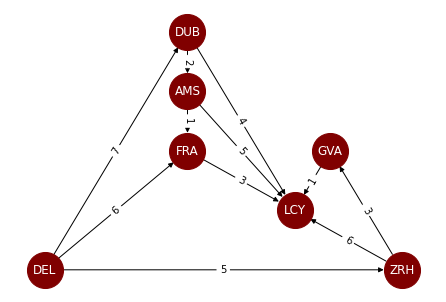

In [1]:
#importing libraries
import networkx as nx

flight_path= nx.DiGraph()

flight_path.add_nodes_from(['DEL','AMS','DUB','ZRH','FRA','LCY'])

flight_path.add_weighted_edges_from([('DEL','ZRH',5),('DEL','FRA',6),('DEL','DUB',7), ('ZRH','LCY',6),
                                     ('FRA','LCY',3),('AMS','LCY',5),('DUB','LCY',4),('AMS','FRA',1),
                                    ('DUB','AMS',2),('ZRH','GVA',3),('GVA','LCY',1)])

pos= nx.planar_layout(flight_path)

# drawing customised nodes
nx.draw(flight_path, pos, with_labels=True, node_size=1300, node_color='maroon', font_color='white')

# adding edge labels
nx.draw_networkx_edge_labels(flight_path, pos, edge_labels = nx.get_edge_attributes(flight_path, 'weight'));

## Dijkstra's Algorithm

Dijkstra's algorithm is used to find the shortest path between nodes or commonly from one source node to every other node in the graph, where edge weight represents the cost/ distance between 2 nodes in the case of a weighted graph. It can work with both directed and undirected graphs, but <b>it is not suitable for graphs with NEGATIVE edges.</b><br>
Time complexity of Dijkstra's algorithm is $O(\ V^{2})$, but with minimum priority queue, it comes down to $O(\ V + E\text{ log } V\ )$

### Algorithm

1. Convert your problem into a graph equivalent.
2. Create a list of unvisited vertices. 
3. Assign the starting point as source node with <b>distance(cost)= 0</b> and other node's distance as infinity.
4. For every unvisited neighbour, calculate the minimum distance from the current node.
5. The new distance is calculated as `minimum(current distance, distance of previous node + edge weight)`
6. When all the neighbours have been visited, remove the node from the unvisited list and select the next node with the minimum distance.
7. Repeat from step 4.
8. The final graph will represent all the nodes with minimum distance and the algorithm will end.

Let's look at the example of the directed graph mentioned above. But, before moving forward, here are some things one should keep in mind. In the following graphs, edge weight defines the distance between 2 nodes, black edge represents unvisited edges, red represents edges that are being traversed, and green represents visited edges. Let's begin!!

According to Dijkstra's algorithm,
- First, assign all stops(nodes) infinite values except the source node (DEL in this case as the path starts from Delhi), which is assigned a value of 0. This is because the distance one needs to cover to reach other nodes is assumed to be unknown and, hence maximum value possible is being assigned. (fig. 1)
- Dijkstra is based on the greedy approach, which means one needs to select the node with the minimum distance, which is DEL having a distance of 0 units, and this approach is being followed in the whole process.
- The next step is to start traversing the neighbours of DEL and update the distance of all neighbouring nodes as shown in fig. 2. While updating the distance, always keep in mind that the updated distance should be `minimum(current distance, distance of previous node + edge weight)`. Like, 
    - DUB : `min(infinity, 7) = 7`
    - FRA : `min(infinity, 6) = 6`
    - ZRH : `min(infinity, 5) = 5`

![Figure 1&2](Graphs/figure1_2.png "Figure 1 and Figure 2")

- Now, pick the next unvisited node with the minimum distance value. ZRH has the minimum distance (5 units), so it's time to update its neighbour's (LCY, GVA) distance.(fig. 3)
    - LCY : `min(infinity, 5+6) = 11`
    - GVA : `min(infinity, 5+3) = 8`
- Similar to the previous step, the next unvisited node with minimum distance is FRA (6 units).Hence, update its neighbours. (fig. 4)
    - AMS : `min(infinity, 6+1) = 7`
    - LCY : `min(11, 6+3) = 9`

![Figure 3&4](Graphs/figure3_4.png "Figure 3 and Figure 4")

- Here, 2 nodes are left with minimum distance (7 units), AMS and DUB. So, let's update their neighbours one by one.(fig. 5)
    - DUB :
        - AMS : `min(7, 7+2) = 7`
        - LCY : `min(9, 7+4) = 9`
    - AMS:
        - LCY : `min(9, 7+5) = 9`
- Among the last 2 nodes, our destination is LCY. So, last update is for GVA's neighbour.
    - LCY : `min(9, 8+1) = 9`
    
Figure 6 shows the final graph with shortest distance to each node from DEL(source node) and it comes out that the shortest distance to LCY from DEL is 9 units which have 2 paths:<br>
- (DEL -> FRA -> LCY) <br>
- (DEL -> ZRH -> GVA -> LCY)

So, one can take any of these paths to reach as soon as possible. But, in case there are more than one path like in this situation, <b>dijkstra's algorithm returns the shortest path with minimum number of edges. </b>

![Figure 5&6](Graphs/figure5_6.png "Figure 5 and Figure 6")

## NetworkX Implementation

In the previous example the number of nodes were less and it wasn't that complicated, but, in real life problems, there can be a lot of nodes and thus, it is needed to maintain proper record. Let's see the example in NetworkX implementation.

In [2]:
#importing required libraries
from heapq import heappush as push
from heapq import heappop as pop
from itertools import count

'''
So, the graph 'flight_path' is already defined with all nodes and edges. Now, before implementing the algorithm, 
one first needs to make the data available in the proper format to access.

The first thing to do is to have a dictionary with every node as keys and (connecting node, weight) as values so that one can
traverse easily.
'''
flight_succ = flight_path._succ if flight_path.is_directed() else flight_path._adj

# we need to extract the distance between 2 nodes from the graph and for that we need to define weight function
def _weight_function(G, weight):
    return lambda u, v, data: data.get(weight, 1)

weight = _weight_function(flight_path, "weight")

'''
The next step is to define various dictionaries to store and track all nodes path.
'''
dist = {}  # dictionary of final distances
seen = {}  # dictionary of visited nodes with recent shortest distance
paths= {}  # dictionary to store path list

# fringe is heapq with 3-tuples (distance,c,node)
# use the count c to avoid comparing nodes (may not be able to)
c = count()
fringe = []

# we want to find the shortest distance from DEL to LCY
source='DEL'
target='LCY'
paths[source]=[source] 

# Now, as I said earlier we'll assign the source node 0 value
seen[source] = 0 
push(fringe, (0, next(c), source))

'''
It's time to start traversing the graph starting from source node.
'''

while fringe: 
        (d, _, v) = pop(fringe) # d will store the distance of the node and v will store the node name
        if v in dist:
            continue  # already searched this node.      
        dist[v] = d 
        if v == target: 
            break
           
        # traversing the neighbours of the node
        for u, e in flight_succ[v].items(): 
            distance = weight(v, u, e)
            
            if distance is None:
                continue
            # vu_dist stores the total distance from source node to u. Like, if v=ZRH and u= GVA, then vu_dist = 8    
            vu_dist = dist[v] + distance 
            
            '''
            If u is already in dist then there can be 2 cases, either the graph has negative cycle or there might
            be another shortest path to u.
            '''
            if u in dist:
                u_dist = dist[u]
                if vu_dist < u_dist:
                    raise ValueError("Contradictory paths found:", "negative weights?")
                    
            # updating the new shortest distance and adding the next node to visit
            elif u not in seen or vu_dist < seen[u]:
                seen[u] = vu_dist
                push(fringe, (vu_dist, next(c), u))
                if paths is not None:
                    paths[u] = paths[v] + [u]

# printing the distance and path from the source node 'DEL' to target node 'LCY'                    
print(dist[target], paths[target])

9 ['DEL', 'FRA', 'LCY']


Don't worry, you don't need to write all this code again and again. NetworkX got you covered!! So, NetworkX provides a lot of functions with the help of which one can actually find the [shortest path](https://networkx.org/documentation/stable/reference/algorithms/shortest_paths.html) based on their needs. 

All functions using dijkstra's algorithm are similar, but, for this example the most suitable is [single_source_dijkstra()](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.weighted.single_source_dijkstra.html#networkx.algorithms.shortest_paths.weighted.single_source_dijkstra). It comes out that this function actually gives the same output as the one calculated in the above example.

In [3]:
nx.single_source_dijkstra(flight_path, 'DEL', target='LCY', weight="weight")

(9, ['DEL', 'FRA', 'LCY'])

## Applications of Dijkstra's Algorithm

It is used as a part of applications to find the shortest path if required. There are other factors as well which are considered in every application while implementing Dijkstra's algorithm. Like,
- In special drones or robots for delivery service, it is used as a part to identify the shortest path possible.
- One of the most common use case is Google Maps. It helps to find the best route possible in shortest time.
- In social media applications, for smaller graphs it can be used effectively to suggest the "people you may know" section.
- As the above example, it can be used in a software which calculates and informs the estimate arrival time, best route etc. of a flight to a user.
- It is used in IP routing to find Open shortest Path First.
- It is used in the telephone network.

## Advantages and Disadvantages of Dijkstra's Algorithm

<b>ADVANTAGES</b>
 - Once it is carried out, we can find the shortest path to all permanently labelled node.
 - Only one diagram is enough to reflect all distances/paths.
 - It is efficient enough to use for relatively large problems.
 
<b>DISADVANTAGES</b>
- It cannot handle negative weights which leads to acyclic graphs and most often cannot obtain the right shortest path.
- It is a greedy algorithm that means it is possible for the algorithm to select the current best option which can make the algorithm get sidetracked following a potential path that doesn’t exist, simply because the edges along it form a short path.

#### Reference

Shivani Sanan, Leena jain, Bharti Kappor (2013). (IJAIEM) "Shortest Path Algorithm" <br>
https://www.ijaiem.org/volume2issue7/IJAIEM-2013-07-23-079.pdf